In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(".\src\data\defects_data.csv")
df.head()


,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64


In [4]:
#hacer que el defect_id sea la columna index
df.set_index('defect_id', inplace=True)

In [82]:
#comprobar si hay valores nulos, en este caso no los hay
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         1000 non-null   int64  
 1   defect_type        1000 non-null   object 
 2   defect_date        1000 non-null   object 
 3   defect_location    1000 non-null   object 
 4   severity           1000 non-null   object 
 5   inspection_method  1000 non-null   object 
 6   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 62.5+ KB


In [5]:
df.describe()

,product_id,repair_cost
count,1000.000000,1000.000000
mean,50.837000,507.627150
std,29.480935,289.623615
min,1.000000,10.220000
25%,26.000000,270.902500
50%,51.000000,506.430000
75%,77.000000,759.065000
max,100.000000,999.640000


In [95]:
valores_unicos = {col: df[col].nunique() for col in df.columns}
valores_unicos

{'product_id': 100,
 'defect_type': 3,
 'defect_date': 182,
 'defect_location': 3,
 'severity': 3,
 'inspection_method': 3,
 'repair_cost': 996}

In [84]:
#convertir la columna defect_date en formato Datetime
df['defect_date'] = pd.to_datetime(df['defect_date'], format='%m/%d/%Y')

In [85]:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion
df_tipificacion["Clasificada_como"] = "Categorica" # PArtiendo de que casi todas parecen categóricas
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
product_id,100,10.0,int64,Numerica Discreta
defect_type,3,0.3,object,Categorica
defect_date,182,18.2,datetime64[ns],Numerica Discreta
defect_location,3,0.3,object,Categorica
severity,3,0.3,object,Categorica
inspection_method,3,0.3,object,Categorica
repair_cost,996,99.6,float64,Numerica Continua


|**Columna/Variable**|**Descripción**|**Tipo_de_Variable**|**Importancia inicial**|**Nota**|
|----------------------|-------------------------------------------|--|--|----------------|
| `defect_id`         | Identificador único de cada defecto           |Indice único | - | no siginifcativo |
| `product_id`        | Identificador del producto                    |Numerica Discreta| 2| no está en el objetivo de este analisis, pero haremos un analisis para saber si hay allguna desviación|
| `defect_type`       | Tipo de defecto                               |Categorica | 1| importante para ver que tipo de defecto es más común y más costoso para poner remedio |
| `defect_date`       | Fecha en la que se detectó el defecto         |Fecha | 3 |  No relevante, aunque haremo un pequeño analisis    |
| `defect_location`   | Ubicación  donde se detectó el defecto  |Categorica |1 | La utilizaremos para el analisis |
| `severity`          | Nivel de gravedad                             |Categorica | 0| importante para comparar la gravedad |
| `inspection_method` | Método utilizado para detectar el defecto     |Categorica | 3| no está en el analisis |
| `repair_cost`       | Coste de reparación del defecto               |Numerica continua |0|   relación directa para saber el coste de las reparaciones|


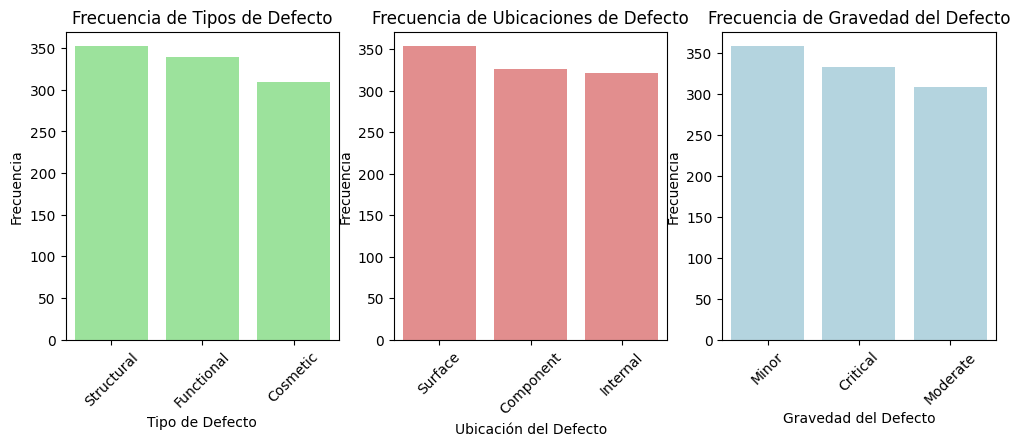

In [34]:
# Análisis de las variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(12, 4))


# Frecuencia de 'defect_type'
defect_type_count = df['defect_type'].value_counts()

# Gráfico de barras de 'defect_type'
sns.barplot(x=defect_type_count.index, y=defect_type_count.values, color='lightgreen', ax=axes[0])
axes[0].set_title('Frecuencia de Tipos de Defecto')
axes[0].set_xlabel('Tipo de Defecto')
axes[0].set_ylabel('Frecuencia')
axes[0].tick_params(axis='x', rotation=45)

# Frecuencia de 'defect_location'
defect_location_count = df['defect_location'].value_counts()

# Gráfico de barras de 'defect_location'
sns.barplot(x=defect_location_count.index, y=defect_location_count.values, color='lightcoral', ax=axes[1])
axes[1].set_title('Frecuencia de Ubicaciones de Defecto')
axes[1].set_xlabel('Ubicación del Defecto')
axes[1].set_ylabel('Frecuencia')
axes[1].tick_params(axis='x', rotation=45)

# Frecuencia de 'severity'
severity_count = df['severity'].value_counts()

# Gráfico de barras de 'severity'
sns.barplot(x=severity_count.index, y=severity_count.values, color='lightblue', ax=axes[2])
axes[2].set_title('Frecuencia de Gravedad del Defecto')
axes[2].set_xlabel('Gravedad del Defecto')
axes[2].set_ylabel('Frecuencia')
axes[2].tick_params(axis='x', rotation=45)

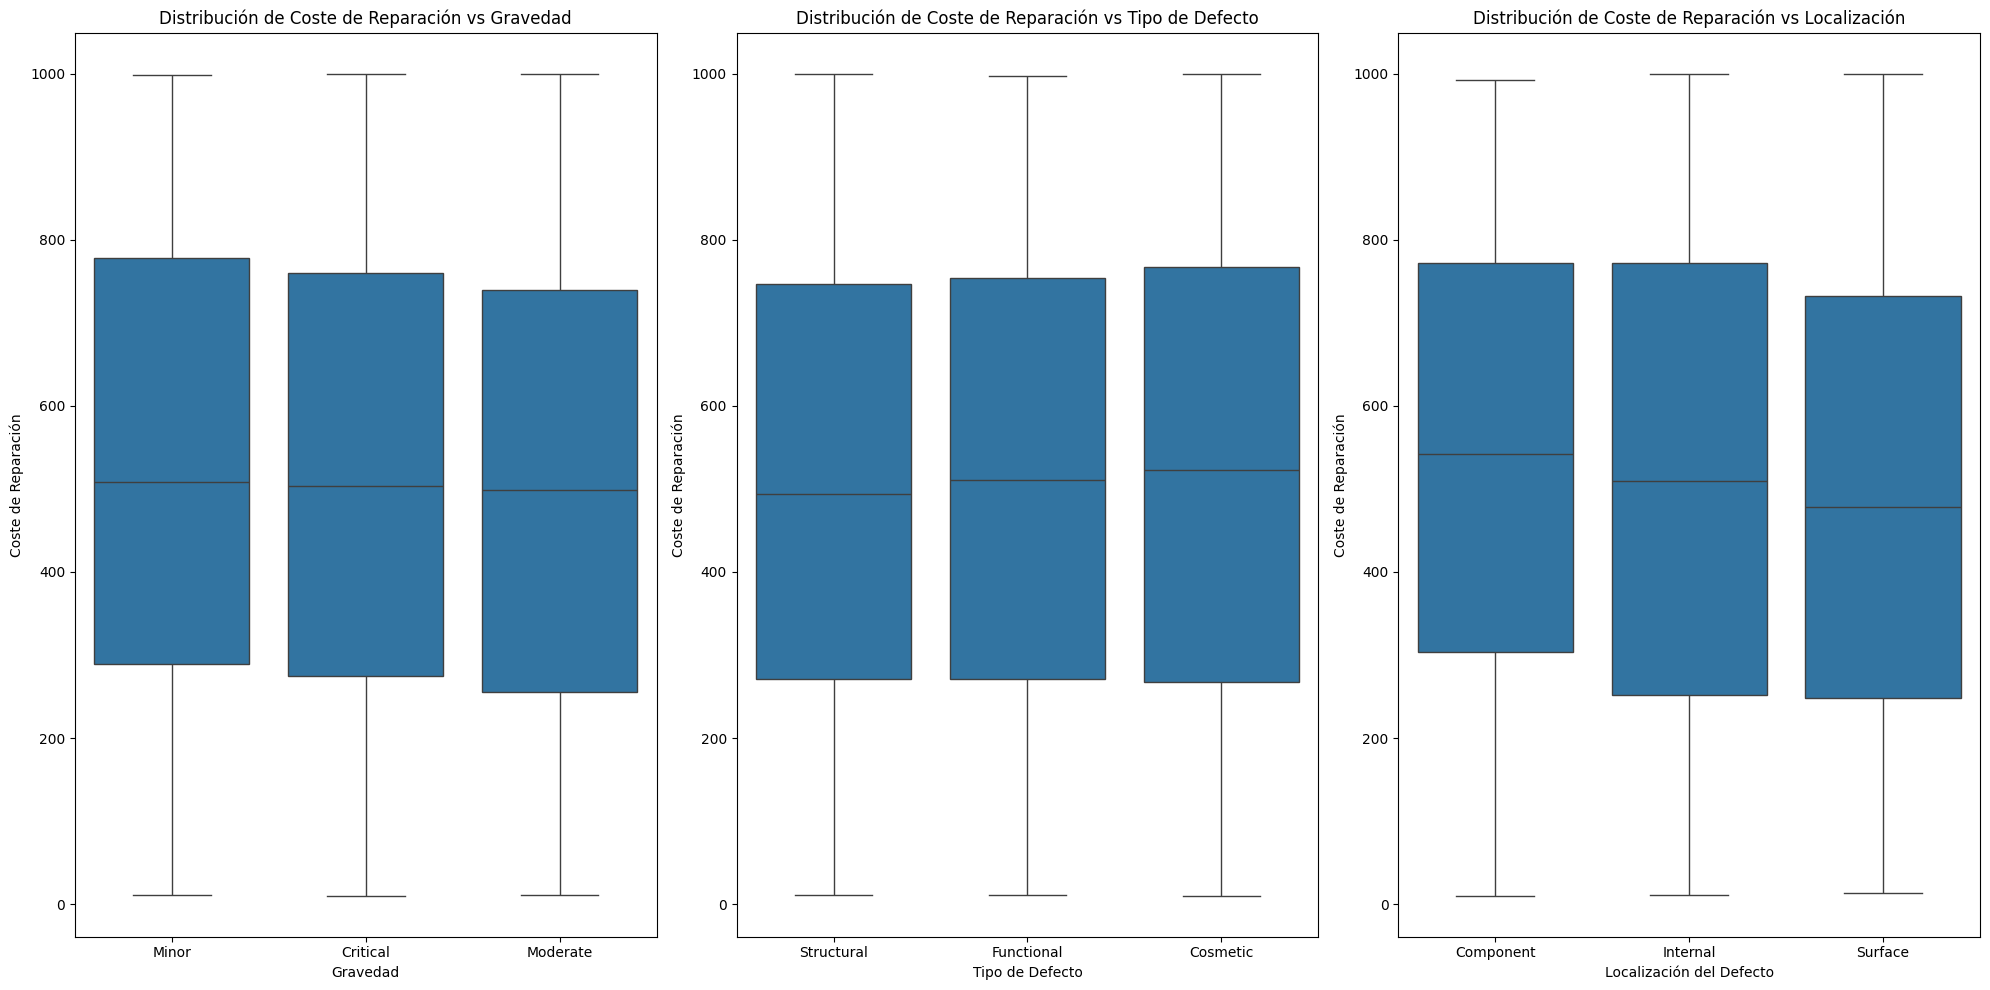

In [ ]:
#ver distribución de los costes de reparacion para cada una de las variables
# Crear un subplot con  filas y 1 columna
fig, axes = plt.subplots(1, 3, figsize=(20, 10))

#oste_reparacion vs Gravedad
sns.boxplot(data=df, x='severity', y='repair_cost', ax=axes[0])
axes[0].set_title('Distribución de Coste de Reparación vs Gravedad')
axes[0].set_xlabel('Gravedad')
axes[0].set_ylabel('Coste de Reparación')

# coste_reparacion vs Tipo de Defecto
sns.boxplot(data=df, x='defect_type', y='repair_cost', ax=axes[1])
axes[1].set_title('Distribución de Coste de Reparación vs Tipo de Defecto')
axes[1].set_xlabel('Tipo de Defecto')
axes[1].set_ylabel('Coste de Reparación')

# coste_reparacion vs Localización
sns.boxplot(data=df, x='defect_location', y='repair_cost', ax=axes[2])
axes[2].set_title('Distribución de Coste de Reparación vs Localización')
axes[2].set_xlabel('Localización del Defecto')
axes[2].set_ylabel('Coste de Reparación')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()

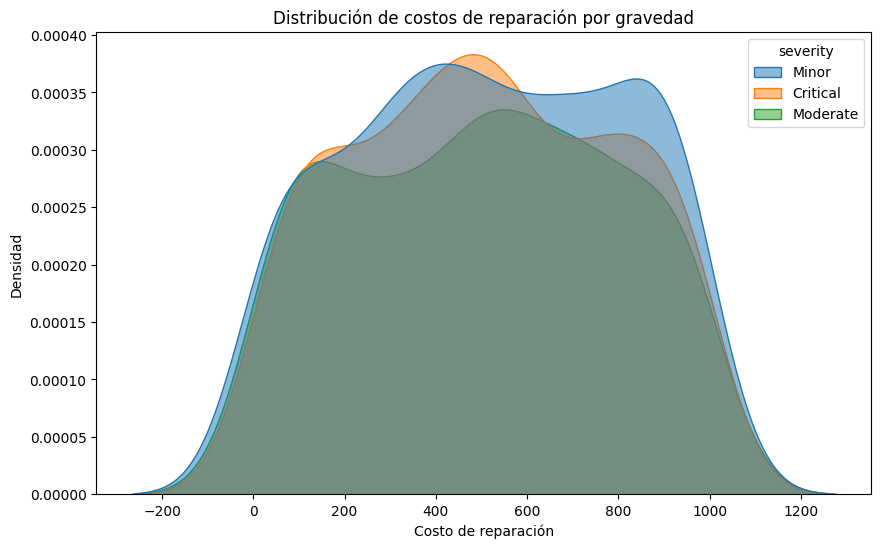

In [54]:
total_cost = df['repair_cost'].sum()


# Calcular los porcentajes para cada categoría
cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
cost_by_severity = df.groupby('severity')['repair_cost'].sum()
cost_by_severity

severity
Critical    168455.25
Minor       184166.97
Moderate    155004.93
Name: repair_cost, dtype: float64

In [55]:
#funcion que pasado un dataframe imprime los 3 graficos tipo donut para las columnas: 
#tipo de defecto
#ubicación del defecto
#gravedad del defecto
def plot_donut_df (df):
    #obtenemos los datos para calcuilar los porcetajes
    total_cost = df['repair_cost'].sum()
    cost_by_defect_type = df.groupby('defect_type')['repair_cost'].sum()
    cost_by_defect_location = df.groupby('defect_location')['repair_cost'].sum()
    cost_by_severity = df.groupby('severity')['repair_cost'].sum()

    # Crear un subplot con tres gráficos
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Función para crear gráficos de donut
    def plot_donut(ax, data, labels, title):
        wedges, texts, autotexts = ax.pie(data, 
                                        labels=labels, 
                                        autopct='%1.1f%%', 
                                        startangle=90, 
                                        )
        for autotext in autotexts:
            autotext.set_color('black')
            autotext.set_fontsize(20) 
        ax.set_title(title)

    # Porcentaje sobre el coste total por tipo de defecto
    plot_donut(axes[0], cost_by_defect_type, cost_by_defect_type.index, 'Porcentaje del coste total por tipo de defecto')

    # Porcentaje sobre el coste total por ubicación del defecto
    plot_donut(axes[1], cost_by_defect_location, cost_by_defect_location.index, 'Porcentaje del coste total por ubicación')

    # Porcentaje sobre el coste total por gravedad del defecto
    plot_donut(axes[2], cost_by_severity, cost_by_severity.index, 'Porcentaje del coste total por gravedad')

    # Ajustar el diseño

    plt.show()

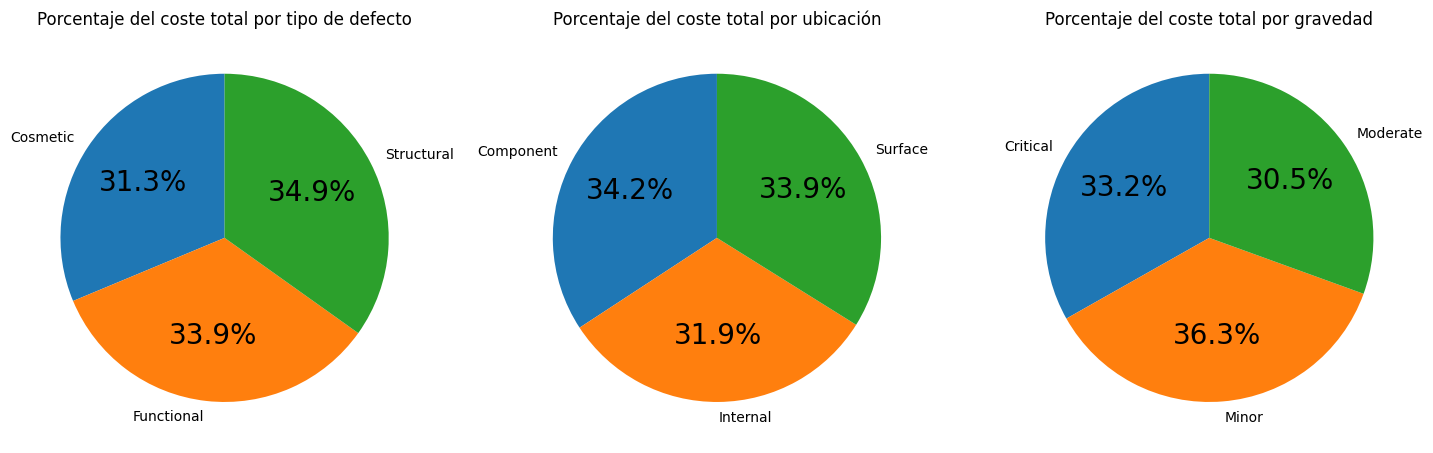

In [19]:
plot_donut_df(df)

In [ ]:

# clasificar los  defectos en 5 grupos según el coste de reparacion
cost_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']  
cost_bins = pd.cut(
    df['repair_cost'], 
    bins=5,  # Dividir en 5 categorías
    labels=cost_labels
)

# Añadir la nueva columna al DataFrame
df['cost_category'] = cost_bins


Text(0, 0.5, 'Número de Incidencias')

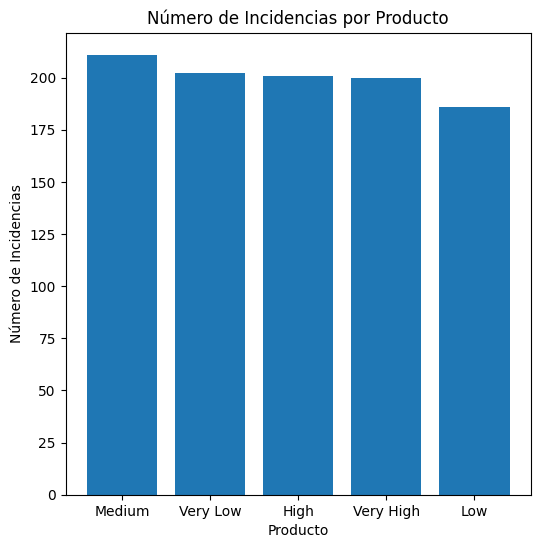

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
cost_category_counts = df['cost_category'].value_counts()
ax.bar(cost_category_counts.index, cost_category_counts.values)
ax.set_title('Número de Incidencias por categoria de producto')
ax.set_xlabel('Producto')
ax.set_ylabel('Número de Incidencias')


Very Low


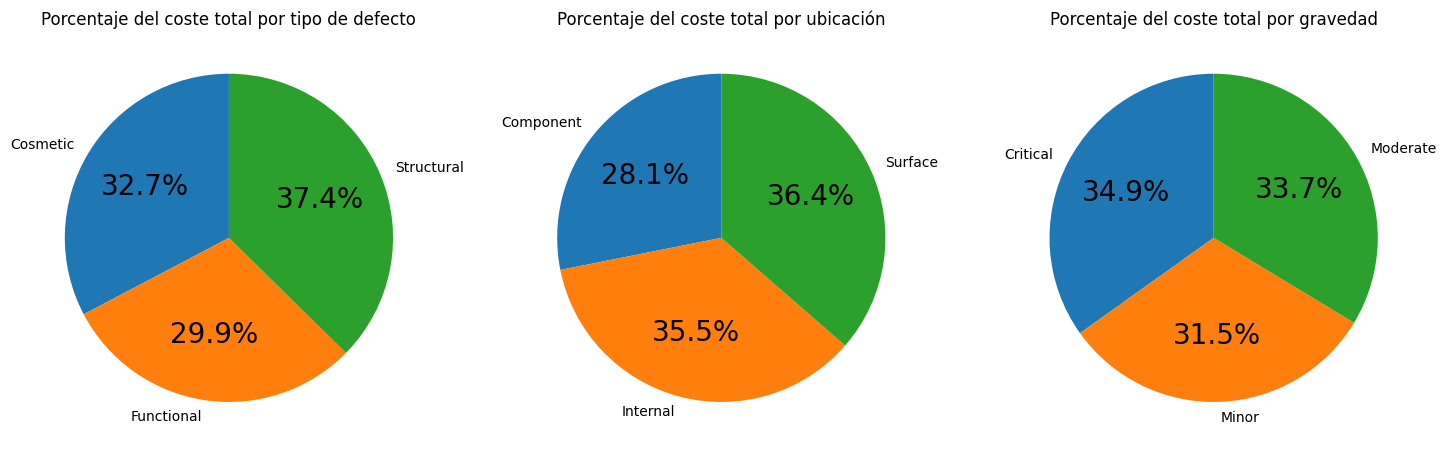

Low


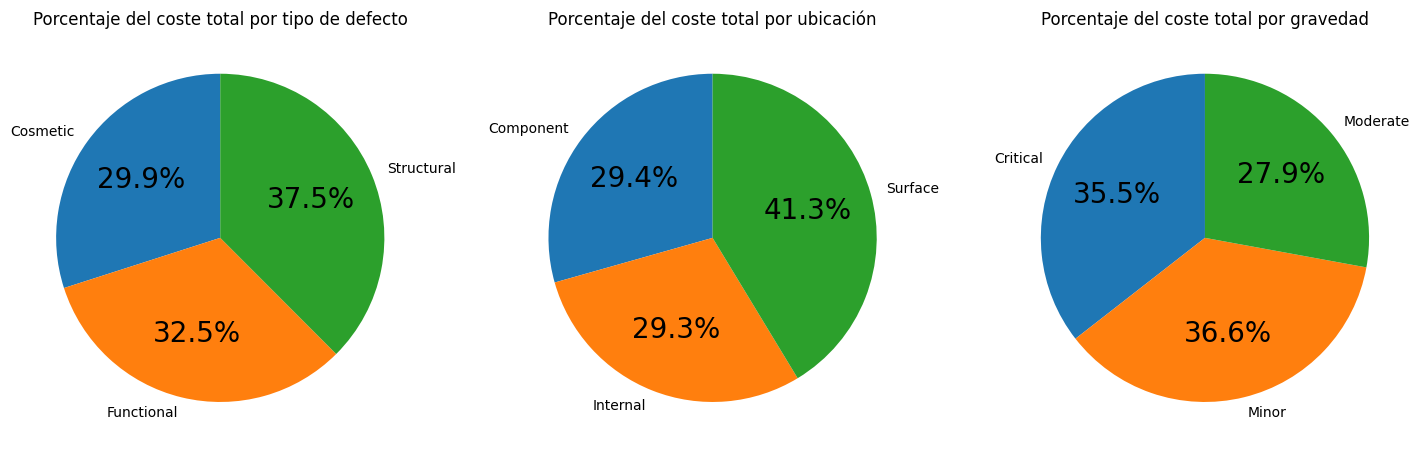

Medium


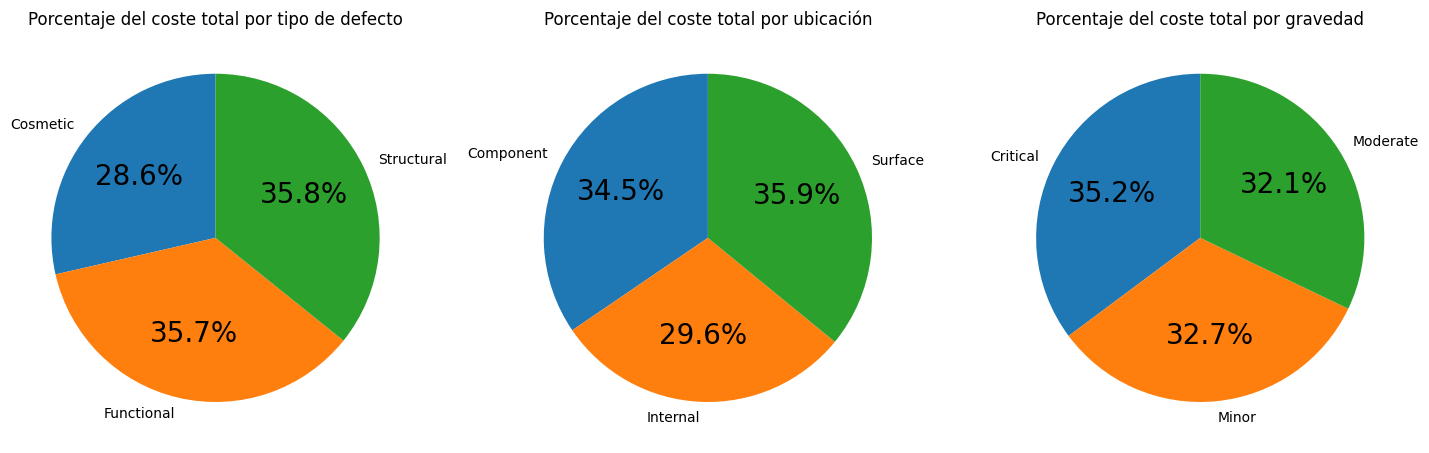

High


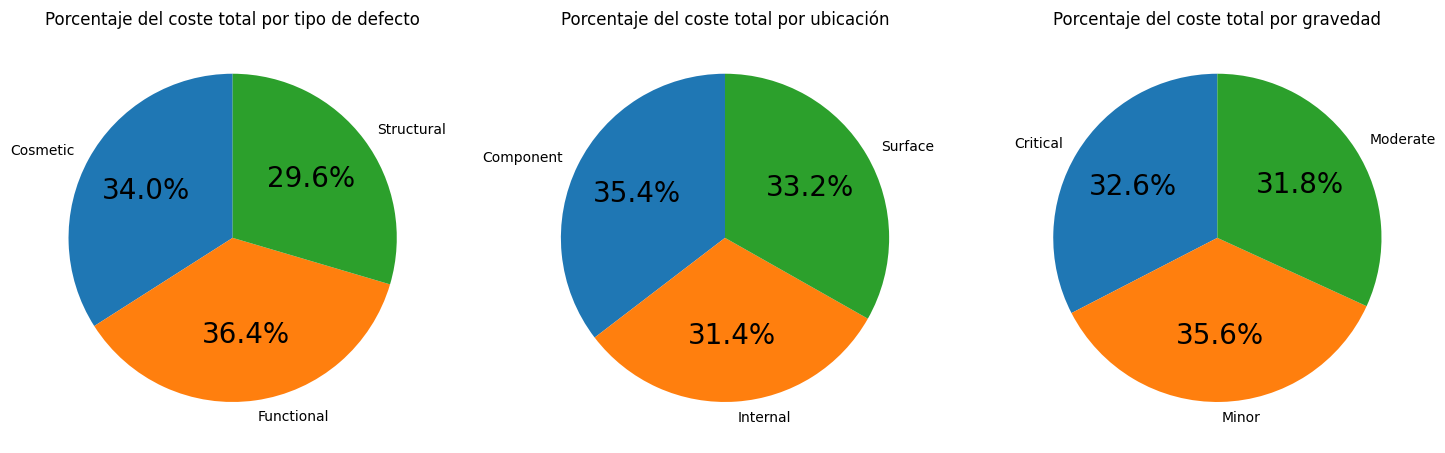

Very High


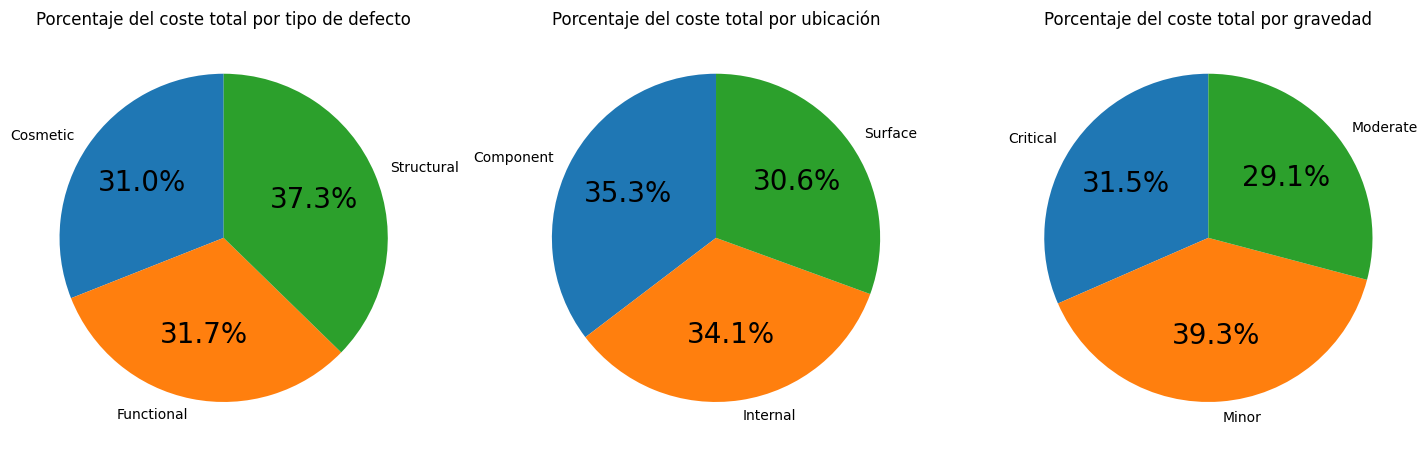

In [58]:
#mostramos los graficos para ver los porcentajes de cada categoria del coste total sobre:
# Tipo 
# Ubicacion 
# Gravedad 

list_cost_category=["Very Low","Low","Medium","High","Very High"]

for categoria in list_cost_category:
    df_temp=df[df['cost_category']==categoria]
    print(categoria)
    plot_donut_df(df_temp)


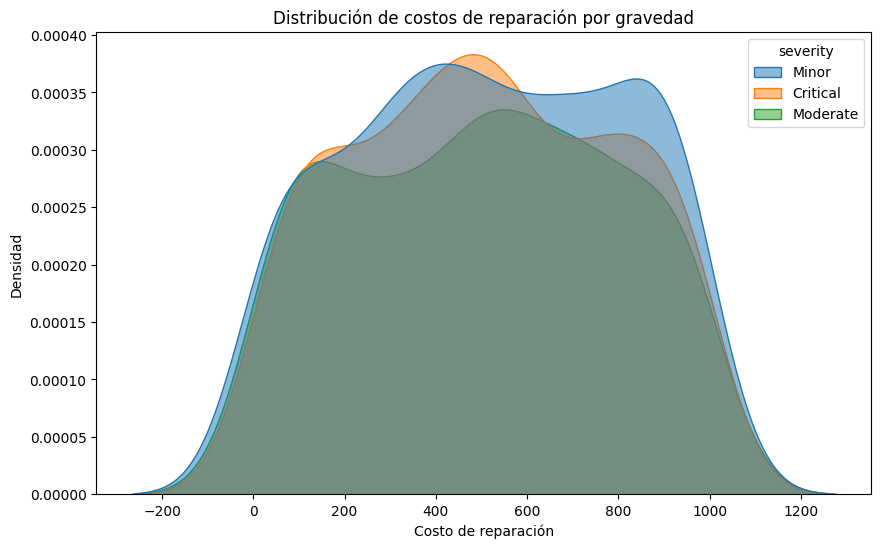

In [96]:
# Gráfico de densidad para `repair_cost` según `severity`
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='repair_cost', hue='severity', fill=True, alpha=0.5)
plt.title('Distribución de costos de reparación por gravedad')
plt.xlabel('Costo de reparación')
plt.ylabel('Densidad')
plt.show()


In [98]:
grouped = df.groupby(['defect_type', 'defect_location', 'severity'])['repair_cost'].agg(
    ['mean', 'median', 'std', 'max', 'min']).reset_index()

# Mostrar las primeras filas de la agrupación
grouped.head()

,defect_type,defect_location,severity,mean,median,std,max,min
0,Cosmetic,Component,Critical,505.355588,495.480,311.588714,987.71,10.22
1,Cosmetic,Component,Minor,647.380857,714.630,270.194190,970.37,19.23
2,Cosmetic,Component,Moderate,592.017857,608.260,235.246544,967.29,97.53
3,Cosmetic,Internal,Critical,416.232286,422.030,264.790964,944.63,15.96
4,Cosmetic,Internal,Minor,493.353750,497.885,343.283777,967.35,18.42


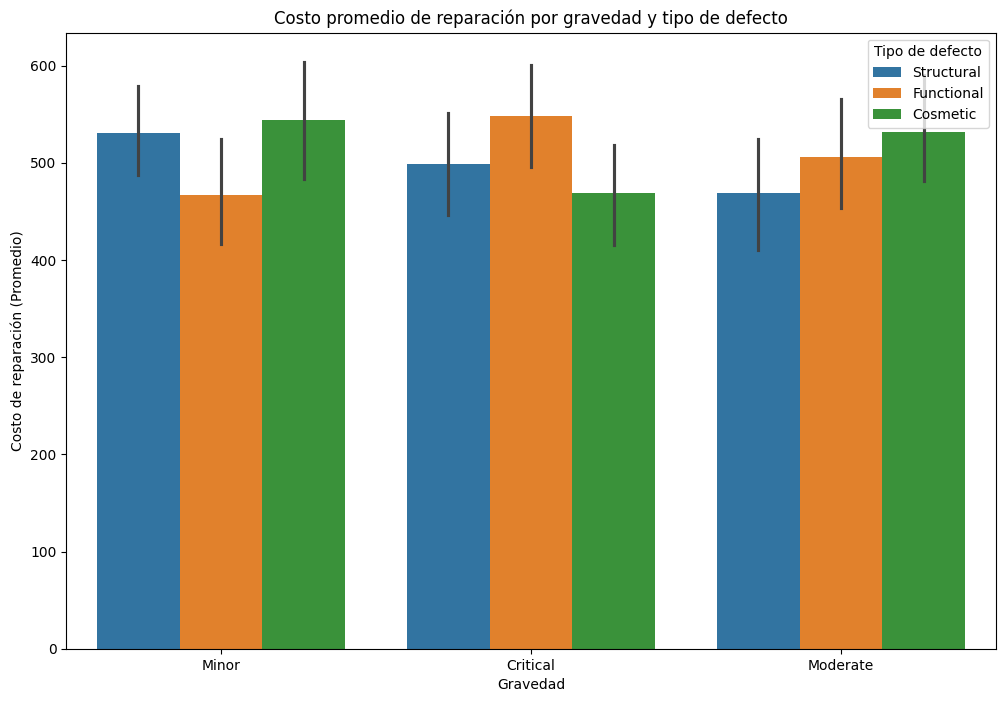

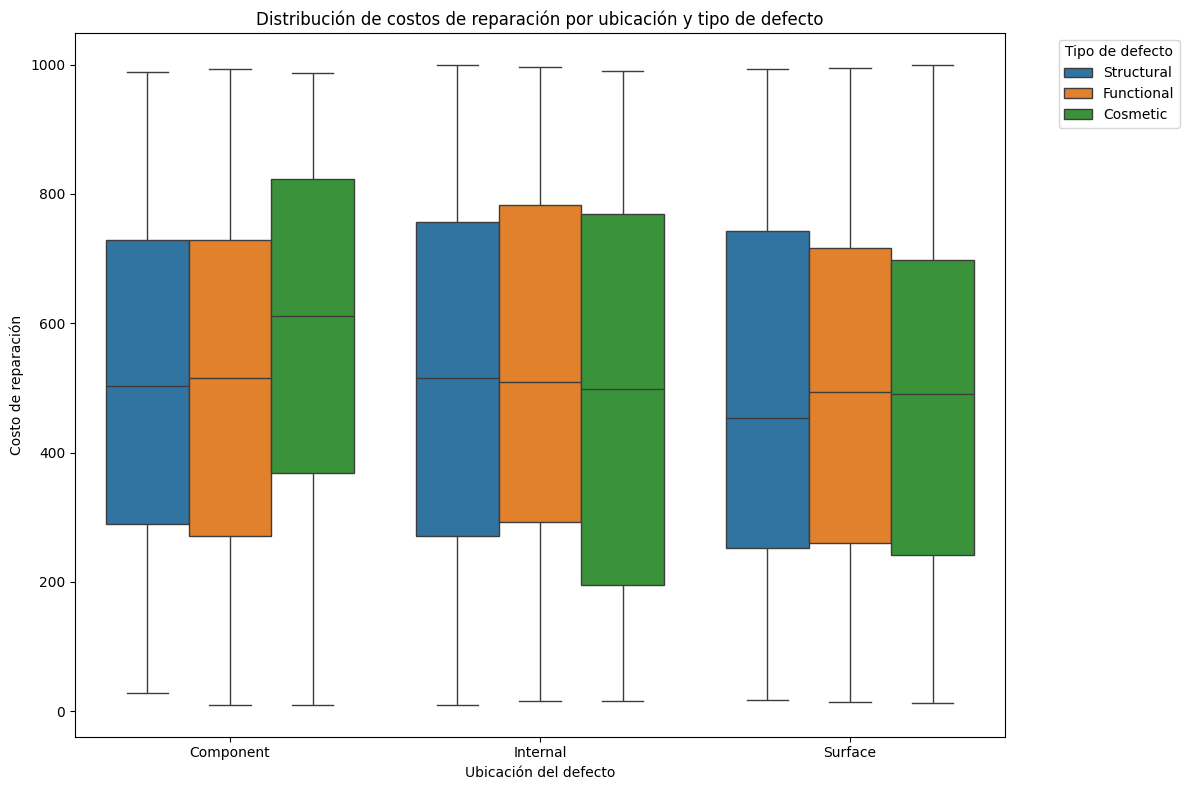

In [99]:
# promedio de repair_cost por gravedad (severity)
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='severity', y='repair_cost', hue='defect_type')
plt.title('Costo promedio de reparación por gravedad y tipo de defecto')
plt.ylabel('Costo de reparación (Promedio)')
plt.xlabel('Gravedad')
plt.legend(title='Tipo de defecto')
plt.show()

# análisis detallado por defect_type y defect_location
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='defect_location', y='repair_cost', hue='defect_type')
plt.title('Distribución de costos de reparación por ubicación y tipo de defecto')
plt.ylabel('Costo de reparación')
plt.xlabel('Ubicación del defecto')
plt.legend(title='Tipo de defecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

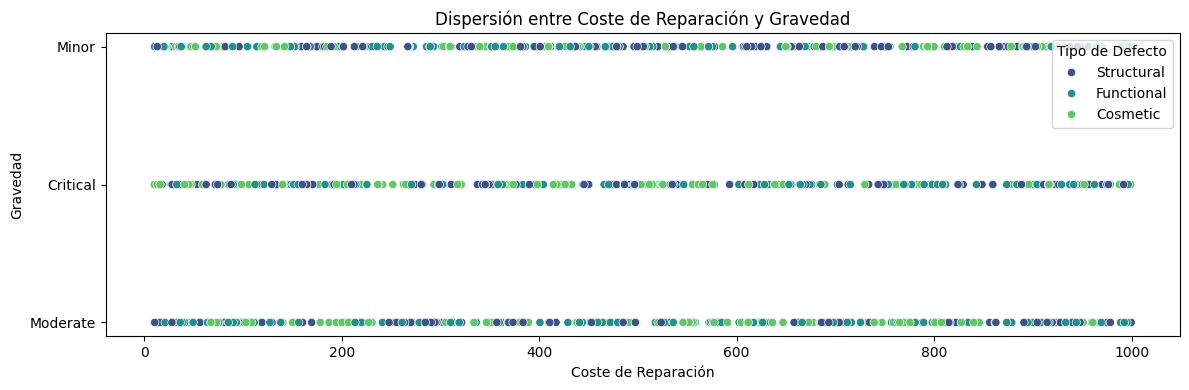

In [106]:
plt.figure(figsize=(12, 4))

# Crear el gráfico de dispersión con leyenda
sns.scatterplot(x='repair_cost', y='severity', data=df, hue='defect_type', palette='viridis')

# Ajustes de los ejes y título
plt.title('Dispersión entre Coste de Reparación y Gravedad')
plt.xlabel('Coste de Reparación')
plt.ylabel('Gravedad')

# Mover la leyenda a la parte superior derecha y mostrarla de forma horizontal
plt.legend(title='Tipo de Defecto', loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

# Ajustar el layout para que la leyenda no se solape
plt.tight_layout()

# Mostrar el gráfico
plt.show()


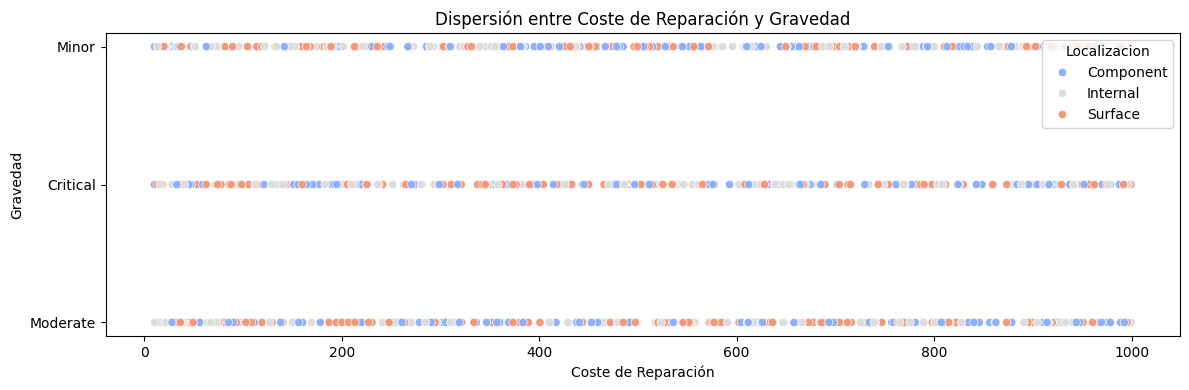

In [107]:
plt.figure(figsize=(12, 4))

# Crear el gráfico de dispersión con leyenda
sns.scatterplot(x='repair_cost', y='severity', data=df, hue='defect_location', palette='coolwarm')

# Ajustes de los ejes y título
plt.title('Dispersión entre Coste de Reparación y Gravedad')
plt.xlabel('Coste de Reparación')
plt.ylabel('Gravedad')

# Mover la leyenda a la parte superior derecha y mostrarla de forma horizontal
plt.legend(title='Localizacion', loc='upper right', bbox_to_anchor=(1, 1), ncol=1)

# Ajustar el layout para que la leyenda no se solape
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [101]:
def calculo_chi2(df, col1, col2):
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(df[col1], df[col2])
    
    # Calcular las frecuencias observadas (O)
    observed = contingency_table.values
    
    # Calcular las frecuencias esperadas (E)
    row_totals = contingency_table.sum(axis=1).values.reshape(-1, 1)
    col_totals = contingency_table.sum(axis=0).values
    total = contingency_table.sum().sum()
    
    # Frecuencias esperadas: (fila_total * columna_total) / total
    expected = (row_totals * col_totals) / total
    
    # Calcular Chi²
    chi2_stat = ((observed - expected) ** 2 / expected).sum()
    
    # Calcular grados de libertad
    dof = (contingency_table.shape[0] - 1) * (contingency_table.shape[1] - 1)
    
    # Resultado
    return chi2_stat, observed, expected, dof

In [103]:
chi2_stat_1, observed_1, expected_1, dof_1 = calculo_chi2(df, 'defect_type', 'severity')
print("defect_type-severity")
print(f"Chi-cuadrado: {chi2_stat_1}")
print(f"Frecuencias observadas:\n{observed_1}")
print(f"Frecuencias esperadas:\n{expected_1}")
print(f"Grados de libertad: {dof_1}")


defect_type-severity
Chi-cuadrado: 3.5729995081236012
Frecuencias observadas:
[[107 106  96]
 [114 113 112]
 [112 139 101]]
Frecuencias esperadas:
[[102.897 110.622  95.481]
 [112.887 121.362 104.751]
 [117.216 126.016 108.768]]
Grados de libertad: 4


In [104]:
chi2_stat_2, observed_2, expected_2, dof_2 = calculo_chi2(df, 'defect_location', 'defect_type')
print("defect_location - defect_type")
print(f"Chi-cuadrado: {chi2_stat_2}")
print(f"Frecuencias observadas:\n{observed_2}")
print(f"Frecuencias esperadas:\n{expected_2}")
print(f"Grados de libertad: {dof_2}")


defect_location - defect_type
Chi-cuadrado: 3.7170044063756373
Frecuencias observadas:
[[ 97 117 112]
 [ 95 116 110]
 [117 106 130]]
Frecuencias esperadas:
[[100.734 110.514 114.752]
 [ 99.189 108.819 112.992]
 [109.077 119.667 124.256]]
Grados de libertad: 4


In [105]:
chi2_stat_3, observed_3, expected_3, dof_3 = calculo_chi2(df, 'inspection_method', 'defect_type')
print("Pregunta 3: ¿inspection_method - defect_type?")
print(f"Chi-cuadrado: {chi2_stat_3}")
print(f"Frecuencias observadas:\n{observed_3}")
print(f"Frecuencias esperadas:\n{expected_3}")
print(f"Grados de libertad: {dof_3}")

Pregunta 3: ¿inspection_method - defect_type?
Chi-cuadrado: 0.44309623349699234
Frecuencias observadas:
[[ 93  99 105]
 [106 124 122]
 [110 116 125]]
Frecuencias esperadas:
[[ 91.773 100.683 104.544]
 [108.768 119.328 123.904]
 [108.459 118.989 123.552]]
Grados de libertad: 4


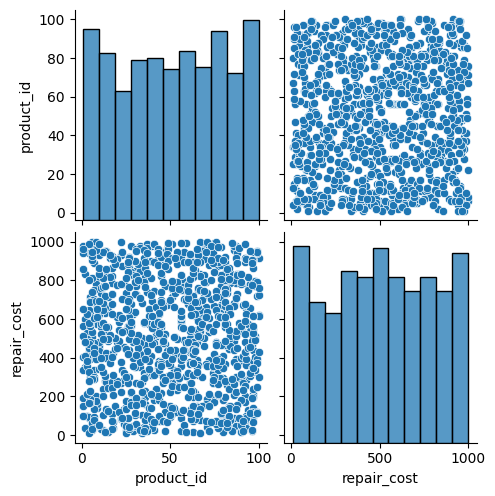

In [108]:
sns.pairplot(df)

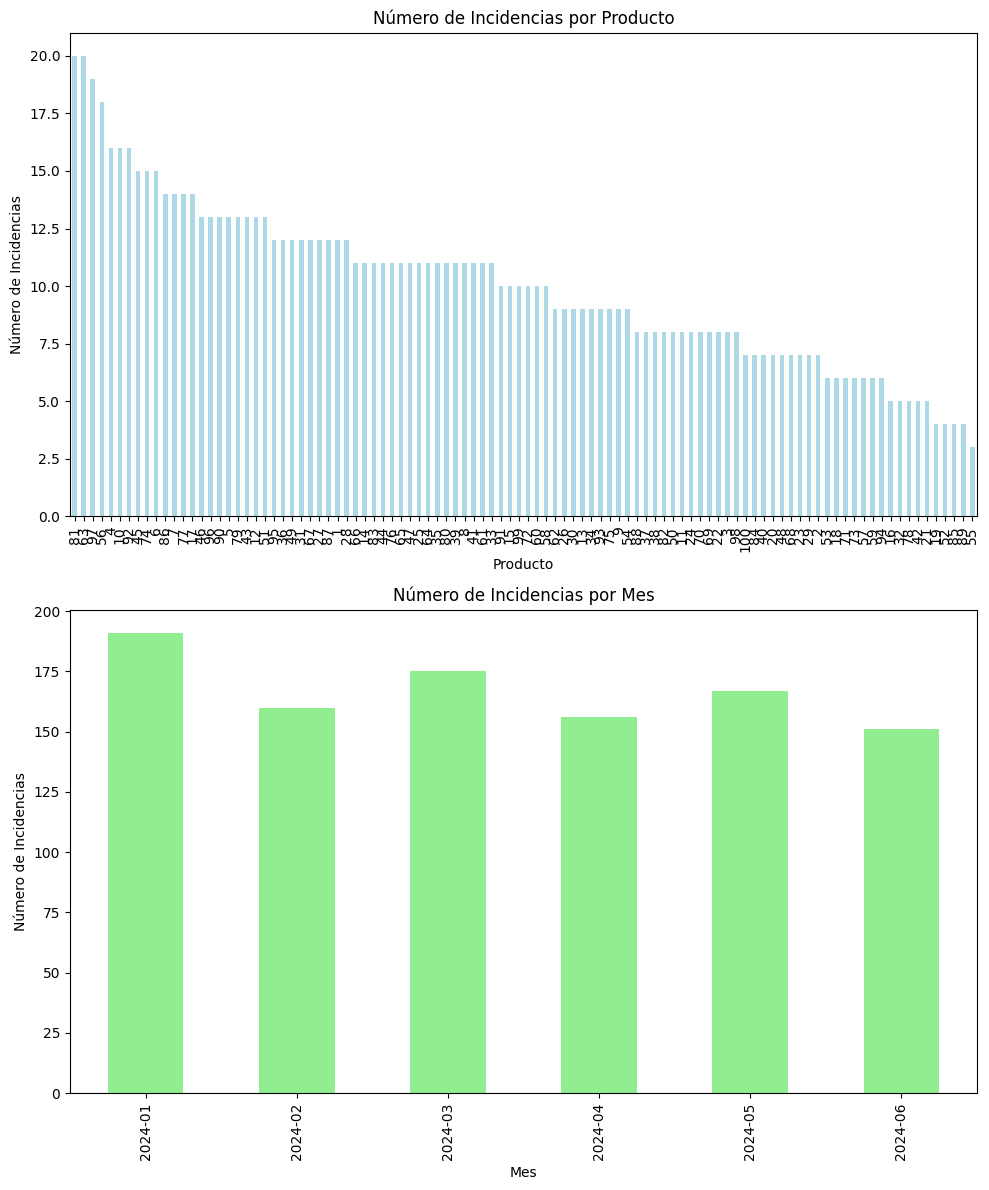

In [100]:


# Contamos las incidencias por producto
product_incidents_count = df['product_id'].value_counts()

# Contamos las incidencias por mes (extraemos el mes de 'defect_date')
df['month'] = df['defect_date'].dt.to_period('M')
monthly_incidents = df['month'].value_counts().sort_index()

# Crear un subplot con 2 filas y 1 columna
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Primer gráfico: número de incidencias por producto
product_incidents_count.plot(kind='bar', color='lightblue', ax=axes[0])
axes[0].set_title('Número de Incidencias por Producto')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Número de Incidencias')

# Segundo gráfico: incidencias por mes
monthly_incidents.plot(kind='bar', color='lightgreen', ax=axes[1])
axes[1].set_title('Número de Incidencias por Mes')
axes[1].set_xlabel('Mes')
axes[1].set_ylabel('Número de Incidencias')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()